In [30]:
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt

import api_function
import stock_function

In [3]:
df_apple = pd.read_csv('data/AAPL-Daily.csv')
df_apple.head()

,timestamp,high,low,open,close,volume,adj_close,ratio,absolute,avg_ratio
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575917,0.446990,0.065356,0.036119
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643499,0.839024,0.122857,0.036119
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783871,0.742256,0.110000,0.036119
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917512,0.626532,0.093928,0.036119
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897021,-0.886021,-0.134644,0.036119


In [4]:
def add_log_returns_column(df, start_date, end_date):
    df.columns = [col.replace(" ", "_").lower() for col in df.columns]

    df.index = pd.to_datetime(df.index)
    mask = (df.index >= start_date) & (df.index <= end_date)
    df = df.loc[mask].reset_index()
    df["log_returns"] = np.log(df.close / df.close.shift())
    return df

In [5]:
df_apple = add_log_returns_column(df_apple, '2021-01-01', '2021-12-31')
df_apple

,index,timestamp,high,low,open,close,volume,adj_close,ratio,absolute,avg_ratio,log_returns


In [6]:
if 'log_returns' in df_apple.columns:
    print('yes')
else:
    print('no')

yes


In [7]:
def calc_volatility(df, start_date, end_date, trading_day): 
    if 'log_returns' in df.columns:
        return df['log_returns'].std()*trading_day**0.5
    else: 
        df = add_log_returns_column(df, start_date, end_date)
        return df['log_returns'].std()*trading_day**0.5

In [8]:
calc_volatility(df_apple, '2021-01-01', '2021-12-31', 252)

nan

Text(0.5, 1.0, 'AAPL volatility: nan%')

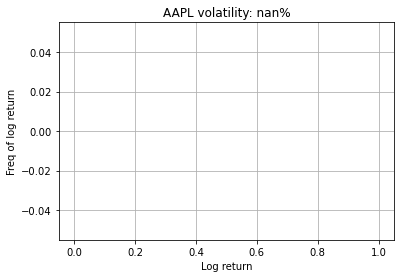

In [9]:
volatility = calc_volatility(df_apple, '2021-01-01', '2021-12-31', 252)
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
df_apple['log_returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('AAPL volatility: ' + str_vol + '%')

In [10]:
volatility = calc_volatility(df_apple, "2021-01-01", "2021-12-31", 252)
str_vol = str(round(volatility, 4) * 100)

fig = px.histogram(df_apple, x="log_returns", title="AAPL volatility: " + str_vol + "%")

fig.show()


In [11]:
df_microsoft = pd.read_csv('data/MSFT-Daily.csv')
df_microsoft.head()

,timestamp,high,low,open,close,volume,adj_close,ratio,absolute,avg_ratio
0,2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.623129,0.828630,0.220001,0.057433
1,2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.132008,2.162565,0.580000,0.057433
2,2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.358175,1.095694,0.300001,0.057433
3,2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.705505,2.106792,0.580000,0.057433
4,2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.406641,-1.105167,-0.309999,0.057433


In [12]:
df_microsoft = add_log_returns_column(df_microsoft, "2021-01-01", "2021-12-31")
df_microsoft


,index,timestamp,high,low,open,close,volume,adj_close,ratio,absolute,avg_ratio,log_returns


In [13]:
volatility = calc_volatility(df_microsoft, "2021-01-01", "2021-12-31", 252)
str_vol = str(round(volatility, 4) * 100)

fig = px.histogram(
    df_microsoft, x="log_returns", title="Volatility: " + str_vol + "%"
)

fig.show()


In [14]:
apple_yahoo = pdr.get_data_yahoo('AAPL', dt.datetime(2012, 1, 1), dt.datetime(2021, 12, 31))

In [15]:
apple_yahoo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575918
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643504
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783869
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917512
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897021


In [16]:
aapl_yahoo_web = web.DataReader('AAPL', 'yahoo', start='2012-01-01', end='2021-12-31')
aapl_yahoo_web.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575919
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643500
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783869
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917512
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897021


In [17]:
apple_yahoo_vo = stock_function.calc_volatility(apple_yahoo, "2021-01-01", "2021-12-31", 252)
apple_yahoo_vo

0.25007576053486047

In [18]:
bitcoin_yahoo = pdr.get_data_yahoo('BTC-USD', dt.datetime(2012, 1, 1), dt.datetime(2021, 12, 31))
print(bitcoin_yahoo.head())

                  High         Low        Open       Close    Volume  \
Date                                                                   
2014-09-17  468.174011  452.421997  465.864014  457.334015  21056800   
2014-09-18  456.859985  413.104004  456.859985  424.440002  34483200   
2014-09-19  427.834991  384.532013  424.102997  394.795990  37919700   
2014-09-20  423.295990  389.882996  394.673004  408.903992  36863600   
2014-09-21  412.425995  393.181000  408.084991  398.821014  26580100   

             Adj Close  
Date                    
2014-09-17  457.334015  
2014-09-18  424.440002  
2014-09-19  394.795990  
2014-09-20  408.903992  
2014-09-21  398.821014  


In [19]:
bitcoin_yahoo_vo = stock_function.calc_volatility(bitcoin_yahoo, "2021-01-01", "2021-12-31", 252)
bitcoin_yahoo_vo

0.6682564913158537

In [20]:
df_bitcoin = pd.read_csv('data/BTC-Daily.csv')
df_bitcoin.head()

,timestamp,high,low,open,close,volume,adj_close,ratio,absolute,avg_ratio
0,2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015,-1.831006,-8.529999,0.240907
1,2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002,-7.096262,-32.419983,0.240907
2,2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990,-6.910351,-29.307007,0.240907
3,2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992,3.605767,14.230988,0.240907
4,2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014,-2.270110,-9.263977,0.240907


In [21]:
df_bitcoin_v = calc_volatility(df_bitcoin, "2021-01-01", "2021-12-31", 252)
df_bitcoin_v

nan

In [22]:
start_date="2012-01-01"
end_date="2021-12-31"
df_aapl = api_function.get_df_stock_daily("AAPL", start_date, end_date)

In [23]:
df_aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575921
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643502
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783872
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917512
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897018
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749


In [24]:
(
    df_aapl,
    df_btc,
    df_fb,
    df_goog,
    df_msft,
    df_tsla,
) = api_function.get_all_focused_stocks(start_date="2012-01-01", end_date="2021-12-31")


In [25]:
df_btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


In [26]:
print(f'Dataframe contains stock prices between {df_btc.index.min()} {df_btc.index.max()}') 
print(f'Total days = {(df_btc.index.max()  - df_btc.index.min()).days} days')

Dataframe contains stock prices between 2014-09-17 00:00:00 2022-01-01 00:00:00
Total days = 2663 days


In [27]:
df_btc.pct_change(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,-0.024166,-0.086906,-0.019328,-0.071926,0.637628,-0.071926
2014-09-19,-0.063531,-0.069164,-0.071700,-0.069843,0.099657,-0.069843
2014-09-20,-0.010609,0.013916,-0.069394,0.035735,-0.027851,0.035735
2014-09-21,-0.025679,0.008459,0.033983,-0.024659,-0.278961,-0.024659
...,...,...,...,...,...,...
2021-12-28,-0.024568,-0.061095,-0.002416,-0.060259,0.374359,-0.060259
2021-12-29,-0.050515,-0.025577,-0.060300,-0.024042,-0.101140,-0.024042
2021-12-30,-0.004983,-0.003056,-0.023796,0.015791,-0.111908,0.015791


In [28]:
mean_daily_ret = df_btc.pct_change(1).mean()
mean_daily_ret

High         0.002336
Low          0.002505
Open         0.002487
Close        0.002512
Volume       0.051722
Adj Close    0.002512
dtype: float64

In [31]:
aapl_rev = stock_function.revenue(df_aapl, '2020-01-01', '2021-12-31', 100)

AttributeError: 'DataFrame' object has no attribute 'timestamp'